In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/Harvey/Downloads/amazon.csv", encoding='Latin-1')

In [2]:
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [3]:
df.tail(10)

,year,state,month,number,date
6444,2007,Tocantins,Dezembro,13.0,2007-01-01
6445,2008,Tocantins,Dezembro,7.0,2008-01-01
6446,2009,Tocantins,Dezembro,46.0,2009-01-01
6447,2010,Tocantins,Dezembro,72.0,2010-01-01
6448,2011,Tocantins,Dezembro,105.0,2011-01-01
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [4]:
print(df.shape)
print(f"Number of rows: {len(df)}")
print(f"Number of columns: {len(df.columns)}")
print(f"Data types of each column: {df.dtypes}")
print(f"Memory requirement: {df.memory_usage().sum() / 1024**2} MB")
duplicate = df.duplicated()
df = df.drop_duplicates()
print(f"Number of duplicates: {duplicate.sum()}")

(6454, 5)
Number of rows: 6454
Number of columns: 5
Data types of each column: year        int64
state      object
month      object
number    float64
date       object
dtype: object
Memory requirement: 0.2463226318359375 MB
Number of duplicates: 32


In [5]:
df = df.drop_duplicates()
duplicate = df.duplicated()
null_count = df.isnull().sum()
print(f"Number of duplicates: {duplicate.sum()}")
print(null_count)
df.describe()

Number of duplicates: 0
year      0
state     0
month     0
number    0
date      0
dtype: int64


,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [6]:
months_initial = df['month'].unique()
months_final = {'Janeiro': "January", 'Fevereiro': "February", 'Março': "March", 'Abril': "April", 'Maio': "May", 'Junho': "June", 'Julho': "July", 'Agosto': "August",
 'Setembro': "September", 'Outubro': "October", 'Novembro': "November", 'Dezembro': "December"}
print(months_initial)

['Janeiro' 'Fevereiro' 'Março' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']


In [7]:
df['month'] = df['month'].replace(months_final)
months_final = df['month'].unique()
print(months_final)

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [8]:
print(f'Total number of fires is {df["number"].sum()}')

Total number of fires is 698811.073


In [11]:
monthly_fires = df.groupby('month')['number'].sum()
yearly_fires = df.groupby('year')['number'].sum()
state_fires = df.groupby('state')['number'].sum()
amazonas_fires = df[df['state'] == 'Amazonas']
total_amazonas_fires = amazonas_fires['number'].sum()

amazonas_df = df.loc[df['state'] == 'Amazonas']
fires_by_year = amazonas_df.groupby('year')['number'].sum()
df['date_column'] = pd.to_datetime(df['date'])
df['day_name'] = df['date_column'].dt.strftime('%A')

In [12]:
fires_by_day = amazonas_df.groupby('day_name')['number'].sum()

print(f"The most amount of fires is in month july with {monthly_fires.max()} fires")
print(f"The most amount of fires is in year 2003 with {yearly_fires.max()} fires")
print(f"The most amount of fires is in state of Mato Grosso with {state_fires.max()} fires")
print(f"The amount of fires in Amazonas is {total_amazonas_fires} fires")
print(f"Fires by year in Amazonas is below \n{fires_by_year}")
print(f"Fires by day in Amazonas is below \n{fires_by_day}")

The most amount of fires is in month july with 92319.113 fires
The most amount of fires is in year 2003 with 42760.674 fires
The most amount of fires is in state of Mato Grosso with 96246.028 fires
The amount of fires in Amazonas is 30650.129 fires
Fires by year in Amazonas is below 
year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64
Fires by day in Amazonas is below 
day_name
Friday       5446.480
Monday       1886.601
Saturday     4162.666
Sunday       3015.186
Thursday     5754.802
Tuesday      6474.217
Wednesday    3910.177
Name: number, dtype: float64


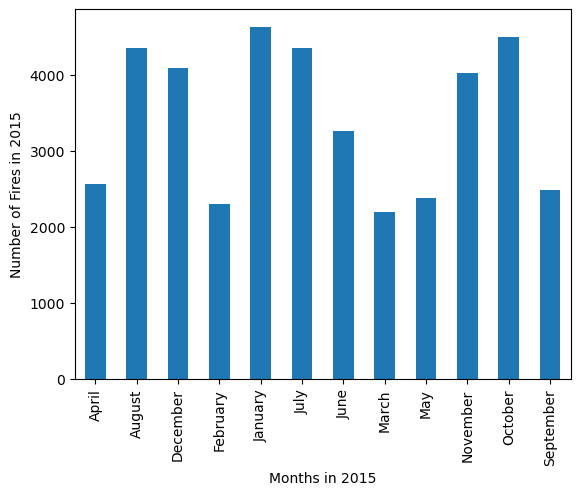

In [13]:
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
year_2015 = df[df['Year'] == 2015]
monthly_fire_2015 = year_2015.groupby('month')['number'].sum()

fig, ax = plt.subplots()
monthly_fire_2015.plot(kind='bar', ax=ax)
ax.set_xlabel('Months in 2015')
ax.set_ylabel('Number of Fires in 2015')
plt.show()

In [14]:
state_fire = df.groupby('state')['number'].mean()
state_fire = pd.DataFrame(state_fire)
state_fires = state_fire.sort_values('number', ascending=False)
state_fires

,number
state,
Sao Paulo,213.896226
Mato Grosso,203.479975
Bahia,187.222703
Piau,158.174674
Goias,157.721841
Minas Gerais,156.800243
Tocantins,141.037176
Amazonas,128.243218
Ceara,127.314071


In [15]:
dec = df.loc[df['month'] == 'December']
dec_state = dec['state'].unique()
print(f'State names with december fire reports are {", ".join(dec_state)}')

State names with december fire reports are Acre, Alagoas, Amapa, Amazonas, Bahia, Ceara, Distrito Federal, Espirito Santo, Goias, Maranhao, Mato Grosso, Minas Gerais, Pará, Paraiba, Pernambuco, Piau, Rio, Rondonia, Roraima, Santa Catarina, Sao Paulo, Sergipe, Tocantins
